# Basic Operations in TensorFlow

Credits: Forked from [TensorFlow-Examples](https://github.com/aymericdamien/TensorFlow-Examples) by Aymeric Damien

## Numpy v.s. TF

$
a = 
\begin{pmatrix}
    0&0\\
    0&0
\end{pmatrix} 
$

$
b = 
\begin{pmatrix}
    1&1\\
    1&1
\end{pmatrix}  
$

* shape, reshape
* sum

### Numpy 

In [1]:
import numpy as np
a = np.zeros((2,2)); b = np.ones((2,2))

In [2]:
np.sum(b, axis=1)

array([ 2.,  2.])

In [3]:
a.shape

(2, 2)

In [4]:
np.reshape(a, (1,4))

array([[ 0.,  0.,  0.,  0.]])

### TensorFlow 

In [5]:
import tensorflow as tf
tf.InteractiveSession()

In [6]:
a = tf.zeros((2,2)); b = tf.ones((2,2))

In [7]:
tf.reduce_sum(b, reduction_indices=1).eval()

array([ 2.,  2.], dtype=float32)

In [8]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [9]:
tf.reshape(a, (1, 4)).eval()

array([[ 0.,  0.,  0.,  0.]], dtype=float32)

* Numpy to TensorFlow chart

|                       | Numpy                                   | TensorFlow                              |
|-----------------------|-----------------------------------------|-----------------------------------------|
| tensor size           | a = np.zeros((2,2)); b = np.ones((2,2)) | a = tf.zeros((2,2)), b = tf.ones((2,2)) |
| sum                   | np.sum(b, axis=1)                       | tf.reduce_sum(a,reduction_indices=[1])  |
| shape                 | a.shape                                 | a.get_shape()                           |
| reshape               | np.reshape(a, (1,4))                    | tf.reshape(a, (1,4))                    |
| operations            | b*5+1                                   | b*5+1                                   |
| matrix multiplication | np.dot(a,b)                             | tf.matmul(a, b)                         |
| index slicing         | a[0,0], a[:,0], a[0,:]                  | a[0,0], a[:,0], a[0,:]                  |

## Basic constant operations

* create constant a = 2, b = 3;
* launch a session
* a + b; a * b.
* matrix multiplcation

$\begin{pmatrix}
    3&3
  \end{pmatrix}
  \begin{pmatrix}
    2\\
    2\\
  \end{pmatrix}
  = 3\times2 + 3\times2 = 12
$

In [10]:
a = tf.constant(2)
b = tf.constant(3)

In [11]:
# Launch the default graph.
with tf.Session() as sess:
    print "a=2, b=3"
    print "Addition with constants: %i" % sess.run(a+b)
    print "Which is the same to (a+b).eval %i" % (a+b).eval()
    print "Multiplication with constants: %i" % sess.run(a*b)
    print "Which is the same to (a*b).eval %i" % (a+b).eval()
    

a=2, b=3
Addition with constants: 5
Which is the same to (a+b).eval 5
Multiplication with constants: 6
Which is the same to (a*b).eval 5


In [12]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])

In [13]:
product = tf.matmul(matrix1, matrix2)

In [14]:
with tf.Session() as sess:
    result = sess.run(product)
    print result

[[ 12.]]


## Basic Operations with placeholders as graph input

* create placeholder
* define operations
* run session

In [15]:
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [16]:
# Define some operations
add = tf.add(a, b)
mul = tf.mul(a, b)

In [17]:
# Launch the default graph.
with tf.Session() as sess:
    # Run every operation with variable input
    print "Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3})
    print "Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3})

Addition with variables: 5
Multiplication with variables: 6


## Basic Operations with Variables

“When you train a model you use variables to hold and update parameters. Variables are in-memory buffers containing tensors”

Counter Example

Credit: https://cs224d.stanford.edu/lectures/CS224d-Lecture7.pdf

* initialize a **variable** state named "counter" with value 0
* define new_value as counter add 1
* define update as assign new_value to state
* run session and **initialize all variables**
* for range(3) run update and print state

In [18]:
state = tf.Variable(0, name="counter") # Initialize state to be 0
new_value = tf.add(state, tf.constant(1)) # new_value = state + 1
update = tf.assign(state, new_value) # Define update operation for state

with tf.Session() as sess:
    # Variables should be initialized before used
    sess.run(tf.initialize_all_variables())
    print("Initial State: {}".format(sess.run(state)))
    for i in range(3):
        sess.run(update)
        print("Round {}: {}".format(i, sess.run(state)))

Initial State: 0
Round 0: 1
Round 1: 2
Round 2: 3


### Difference between Variable and Placeholder

In short, you use **tf.Variable** for trainable variables such as weights (W) and biases (B) for your model. **tf.placeholder** is used to feed actual training examples.

Credit: http://stackoverflow.com/questions/36693740/whats-the-difference-between-tf-placeholder-and-tf-variable

# Linear Regression in TensorFlow

$L = \text{Squared Error} = \frac{1}{2n}||Y-(XW+b)||^2_{l_2} $

$W_{t+1} = W_{t} - \eta\nabla_{W_t}L$

In [21]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
rng = numpy.random

In [25]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [26]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

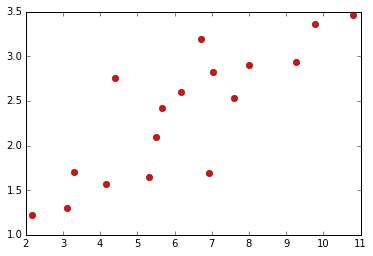

In [27]:
plt.plot(train_X, train_Y, 'ro', label='Original data')

In [19]:
# tf Graph Input (X, y)
# tip: initialize X and y as placeholders of float
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [22]:
# Create Model
# Set model weights (W, b)
# tip: initialize W and b as randome variable with value rng.randn()
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [23]:
# Construct a linear model
# activation = W * X + b
activation = tf.add(tf.mul(X, W), b)

In [28]:
# Define the cost function (the squared errors)
# cost = (activation - y)**2 / (2 * n_sample)
# use tf.train.GradientDescentOptimizer() as optimizer
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [29]:
# Initializing the variables
init = tf.initialize_all_variables()

Epoch: 0001 cost= 1.553576231 W= 0.824095 b= -1.69147
Epoch: 0051 cost= 0.425865948 W= 0.579683 b= -1.57317
Epoch: 0101 cost= 0.385574698 W= 0.560051 b= -1.43194
Epoch: 0151 cost= 0.349934638 W= 0.541587 b= -1.29911
Epoch: 0201 cost= 0.318408996 W= 0.524221 b= -1.17418
Epoch: 0251 cost= 0.290523797 W= 0.507888 b= -1.05668
Epoch: 0301 cost= 0.265857995 W= 0.492526 b= -0.946169
Epoch: 0351 cost= 0.244040236 W= 0.478077 b= -0.842229
Epoch: 0401 cost= 0.224741459 W= 0.464488 b= -0.74447
Epoch: 0451 cost= 0.207671434 W= 0.451708 b= -0.652527
Epoch: 0501 cost= 0.192572460 W= 0.439687 b= -0.566051
Epoch: 0551 cost= 0.179217100 W= 0.428381 b= -0.484719
Epoch: 0601 cost= 0.167404011 W= 0.417748 b= -0.408223
Epoch: 0651 cost= 0.156955123 W= 0.407747 b= -0.336277
Epoch: 0701 cost= 0.147713065 W= 0.398341 b= -0.26861
Epoch: 0751 cost= 0.139538422 W= 0.389494 b= -0.204967
Epoch: 0801 cost= 0.132307976 W= 0.381173 b= -0.14511
Epoch: 0851 cost= 0.125912696 W= 0.373348 b= -0.0888125
Epoch: 0901 cost= 

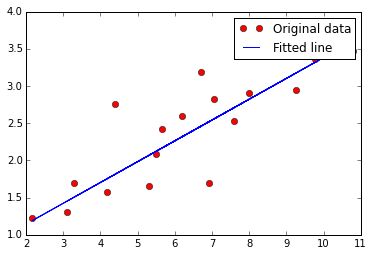

In [30]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()